Prepare a prediction model for profit of **50_startups data.**
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Load the dataset
data = pd.read_csv('/content/50_Startups.csv')
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
#Dimensions of data
print('Rows:',data.shape[0],'Columns:',data.shape[1])

Rows: 50 Columns: 5


**EDA and Visualization**

In [4]:
#Ckeck for null values
print(data.info())        #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [5]:
#rename columns
data_1 = data.rename({'R&D Spend':'R_D_S','Administration':'ADM','Marketing Spend':'MS'},axis=1)
data_1.head()

,R_D_S,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
#Check for repeated values
print('Duplicate values:',data_1.duplicated().sum())            #No duplicate values

Duplicate values: 0


In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**Correlation Analysis**

In [8]:
#Find correlation between the columns
cr = data_1.corr()
print(cr)           # there is direct relationship with the target column i.e. Profit

           R_D_S       ADM        MS    Profit
R_D_S   1.000000  0.241955  0.724248  0.972900
ADM     0.241955  1.000000 -0.032154  0.200717
MS      0.724248 -0.032154  1.000000  0.747766
Profit  0.972900  0.200717  0.747766  1.000000


<ipython-input-8-f0923516b2d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = data_1.corr()


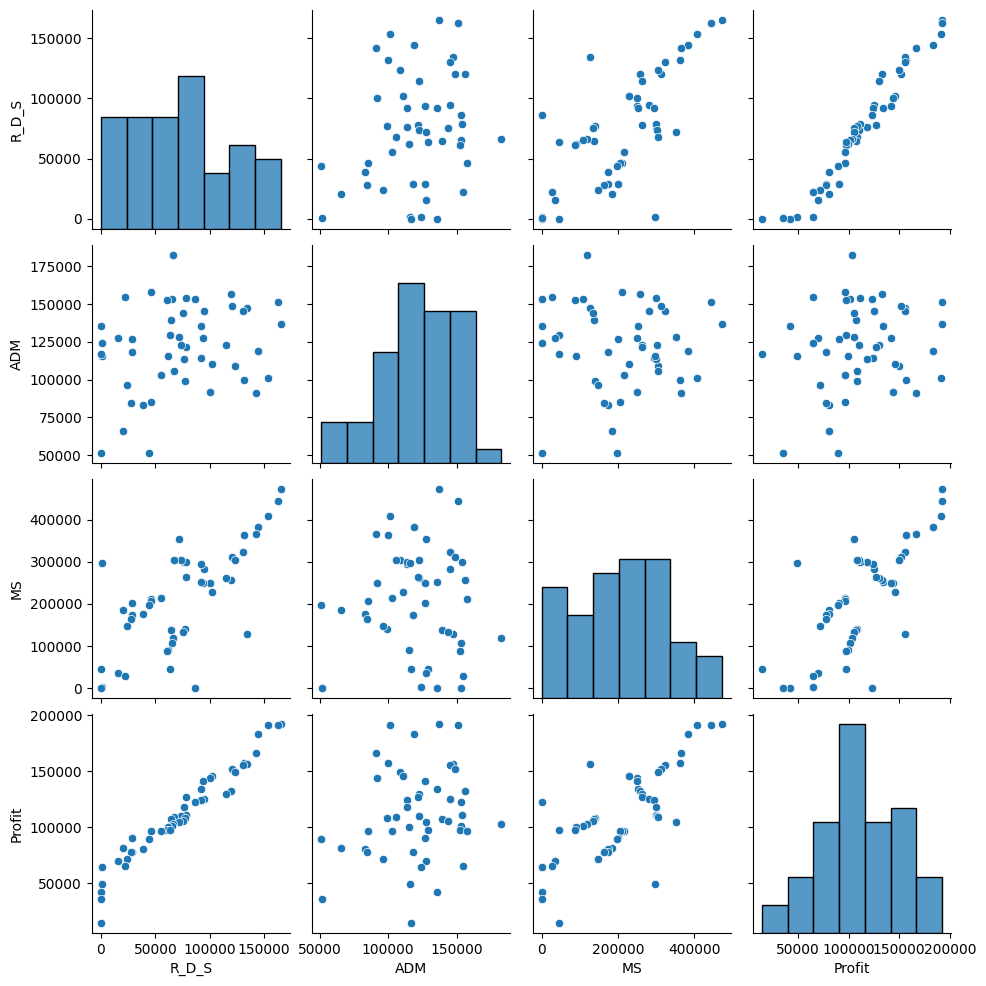

In [9]:
sns.pairplot(data_1)

<Axes: >

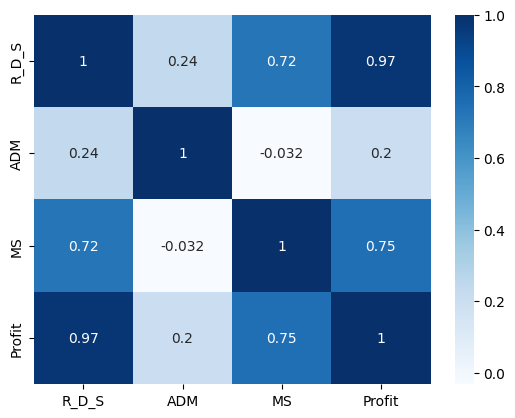

In [10]:
sns.heatmap(cr,annot=True,cmap='Blues')

**Model Building**

In [11]:
model = smf.ols('Profit~R_D_S+ADM+MS',data=data_1).fit()

**Model Testing**

In [12]:
model.summary()           #Model accuracy = 94.8%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        10:00:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_S          0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.pvalues

Intercept    1.057379e-09
R_D_S        2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64

In [14]:
#Checking for Multi-collinearity

rsquared_R_D_S = smf.ols('R_D_S~ADM+MS',data=data_1).fit().rsquared
VIF_R_D_S = 1/(1-rsquared_R_D_S)

rsquared_ADM = smf.ols('ADM~R_D_S+MS',data=data_1).fit().rsquared
VIF_ADM = 1/(1-rsquared_ADM)

rsquared_MS = smf.ols('MS~R_D_S+ADM',data=data_1).fit().rsquared
VIF_MS = 1/(1-rsquared_MS)

VIF = {'Features': ['R_D_S','ADM','MS'],'VIF':[VIF_R_D_S,VIF_ADM,VIF_MS]}
VIF_frame = pd.DataFrame(VIF)
VIF_frame

,Features,VIF
0,R_D_S,2.468903
1,ADM,1.175091
2,MS,2.326773


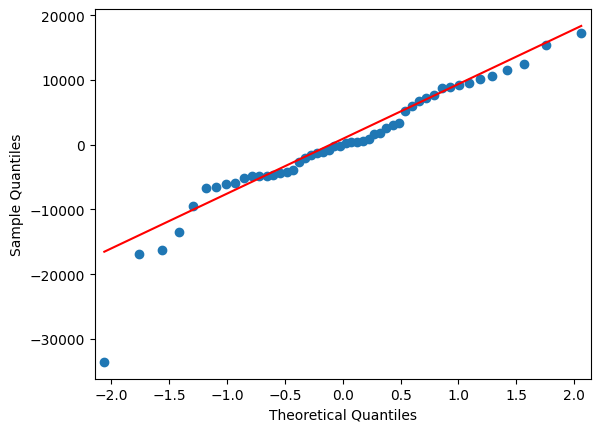

In [15]:
#Residual Analysis
qqplot = sm.qqplot(model.resid,line='q')
plt.show()

In [16]:
list(np.where(model.resid<-30000))

[array([49])]

In [17]:
#cook's distance
model_influence = model.get_influence()
c,standard_distance = model_influence.cooks_distance

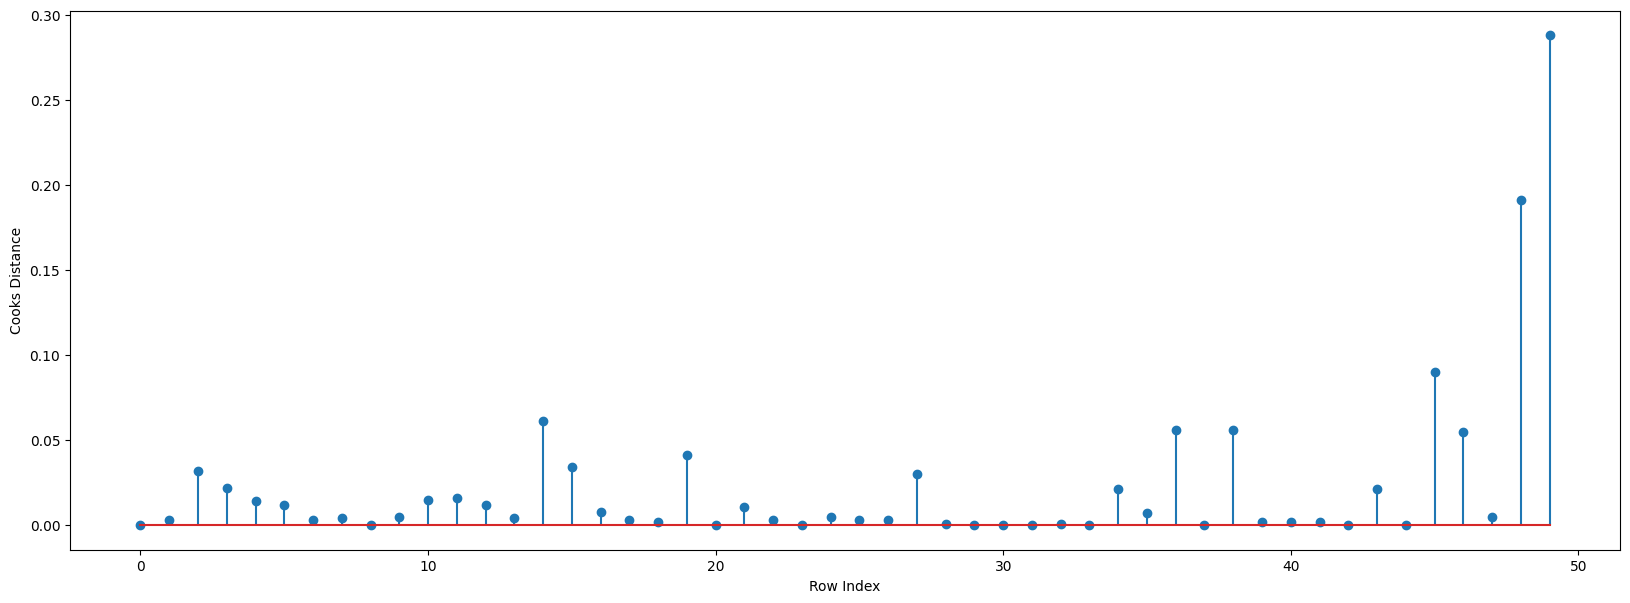

In [18]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [19]:
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

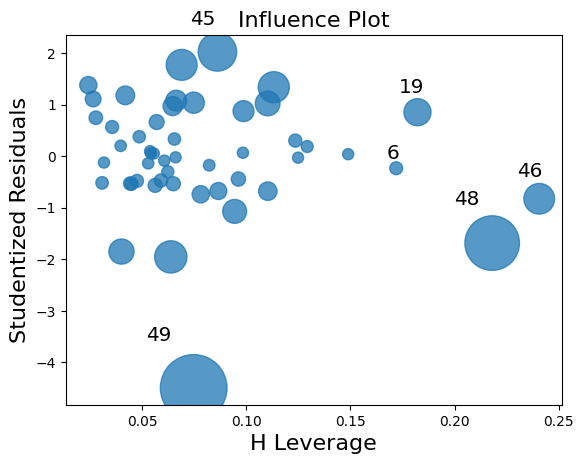

In [20]:
influence_plot(model)
plt.show()

In [21]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('leverage_cutoff:',leverage_cutoff)

leverage_cutoff: 0.36


In [22]:
#build model
model.predict(data_1)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [23]:
data_2 = pd.DataFrame({'Predicted values':np.round(model.predict(data_1),2),'Error value':data.Profit-np.round(model.predict(data_1),2)})
data_3 = pd.concat([data_1,data_2],axis=1)
data_3

,R_D_S,ADM,MS,State,Profit,Predicted values,Error value
0,165349.20,136897.80,471784.10,New York,192261.83,192521.25,-259.42
1,162597.70,151377.59,443898.53,California,191792.06,189156.77,2635.29
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.28,8903.11
3,144372.41,118671.85,383199.62,New York,182901.99,173696.70,9205.29
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.51,-5951.57
5,131876.90,99814.71,362861.36,New York,156991.12,163580.78,-6589.66
6,134615.46,147198.87,127716.82,California,156122.51,158114.10,-1991.59
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.36,-4268.76
8,120542.52,148718.95,311613.29,New York,152211.77,151741.70,470.07
9,123334.88,108679.17,304981.62,California,149759.96,154884.68,-5124.72


Consider only the below columns and prepare a prediction model for predicting Price.

**Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]**

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [25]:
#load the dataset
toyota = pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [26]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [27]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [28]:
toyota1 = pd.DataFrame({"Price":toyota.Price, "Age":toyota.Age_08_04, "KM":toyota.KM,"HP":toyota.HP, "CC":toyota.cc, "Doors":toyota.Doors, "Gears":toyota.Gears, "QuarterlyTax":toyota.Quarterly_Tax, "Weight":toyota.Weight})
toyota1                    

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [29]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1436 non-null   int64
 1   Age           1436 non-null   int64
 2   KM            1436 non-null   int64
 3   HP            1436 non-null   int64
 4   CC            1436 non-null   int64
 5   Doors         1436 non-null   int64
 6   Gears         1436 non-null   int64
 7   QuarterlyTax  1436 non-null   int64
 8   Weight        1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [30]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [31]:
  toyota2 = toyota1.drop_duplicates().reset_index(drop=True)
  toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [32]:
toyota2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


**Correlation Analysis**

In [33]:
toyota2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QuarterlyTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


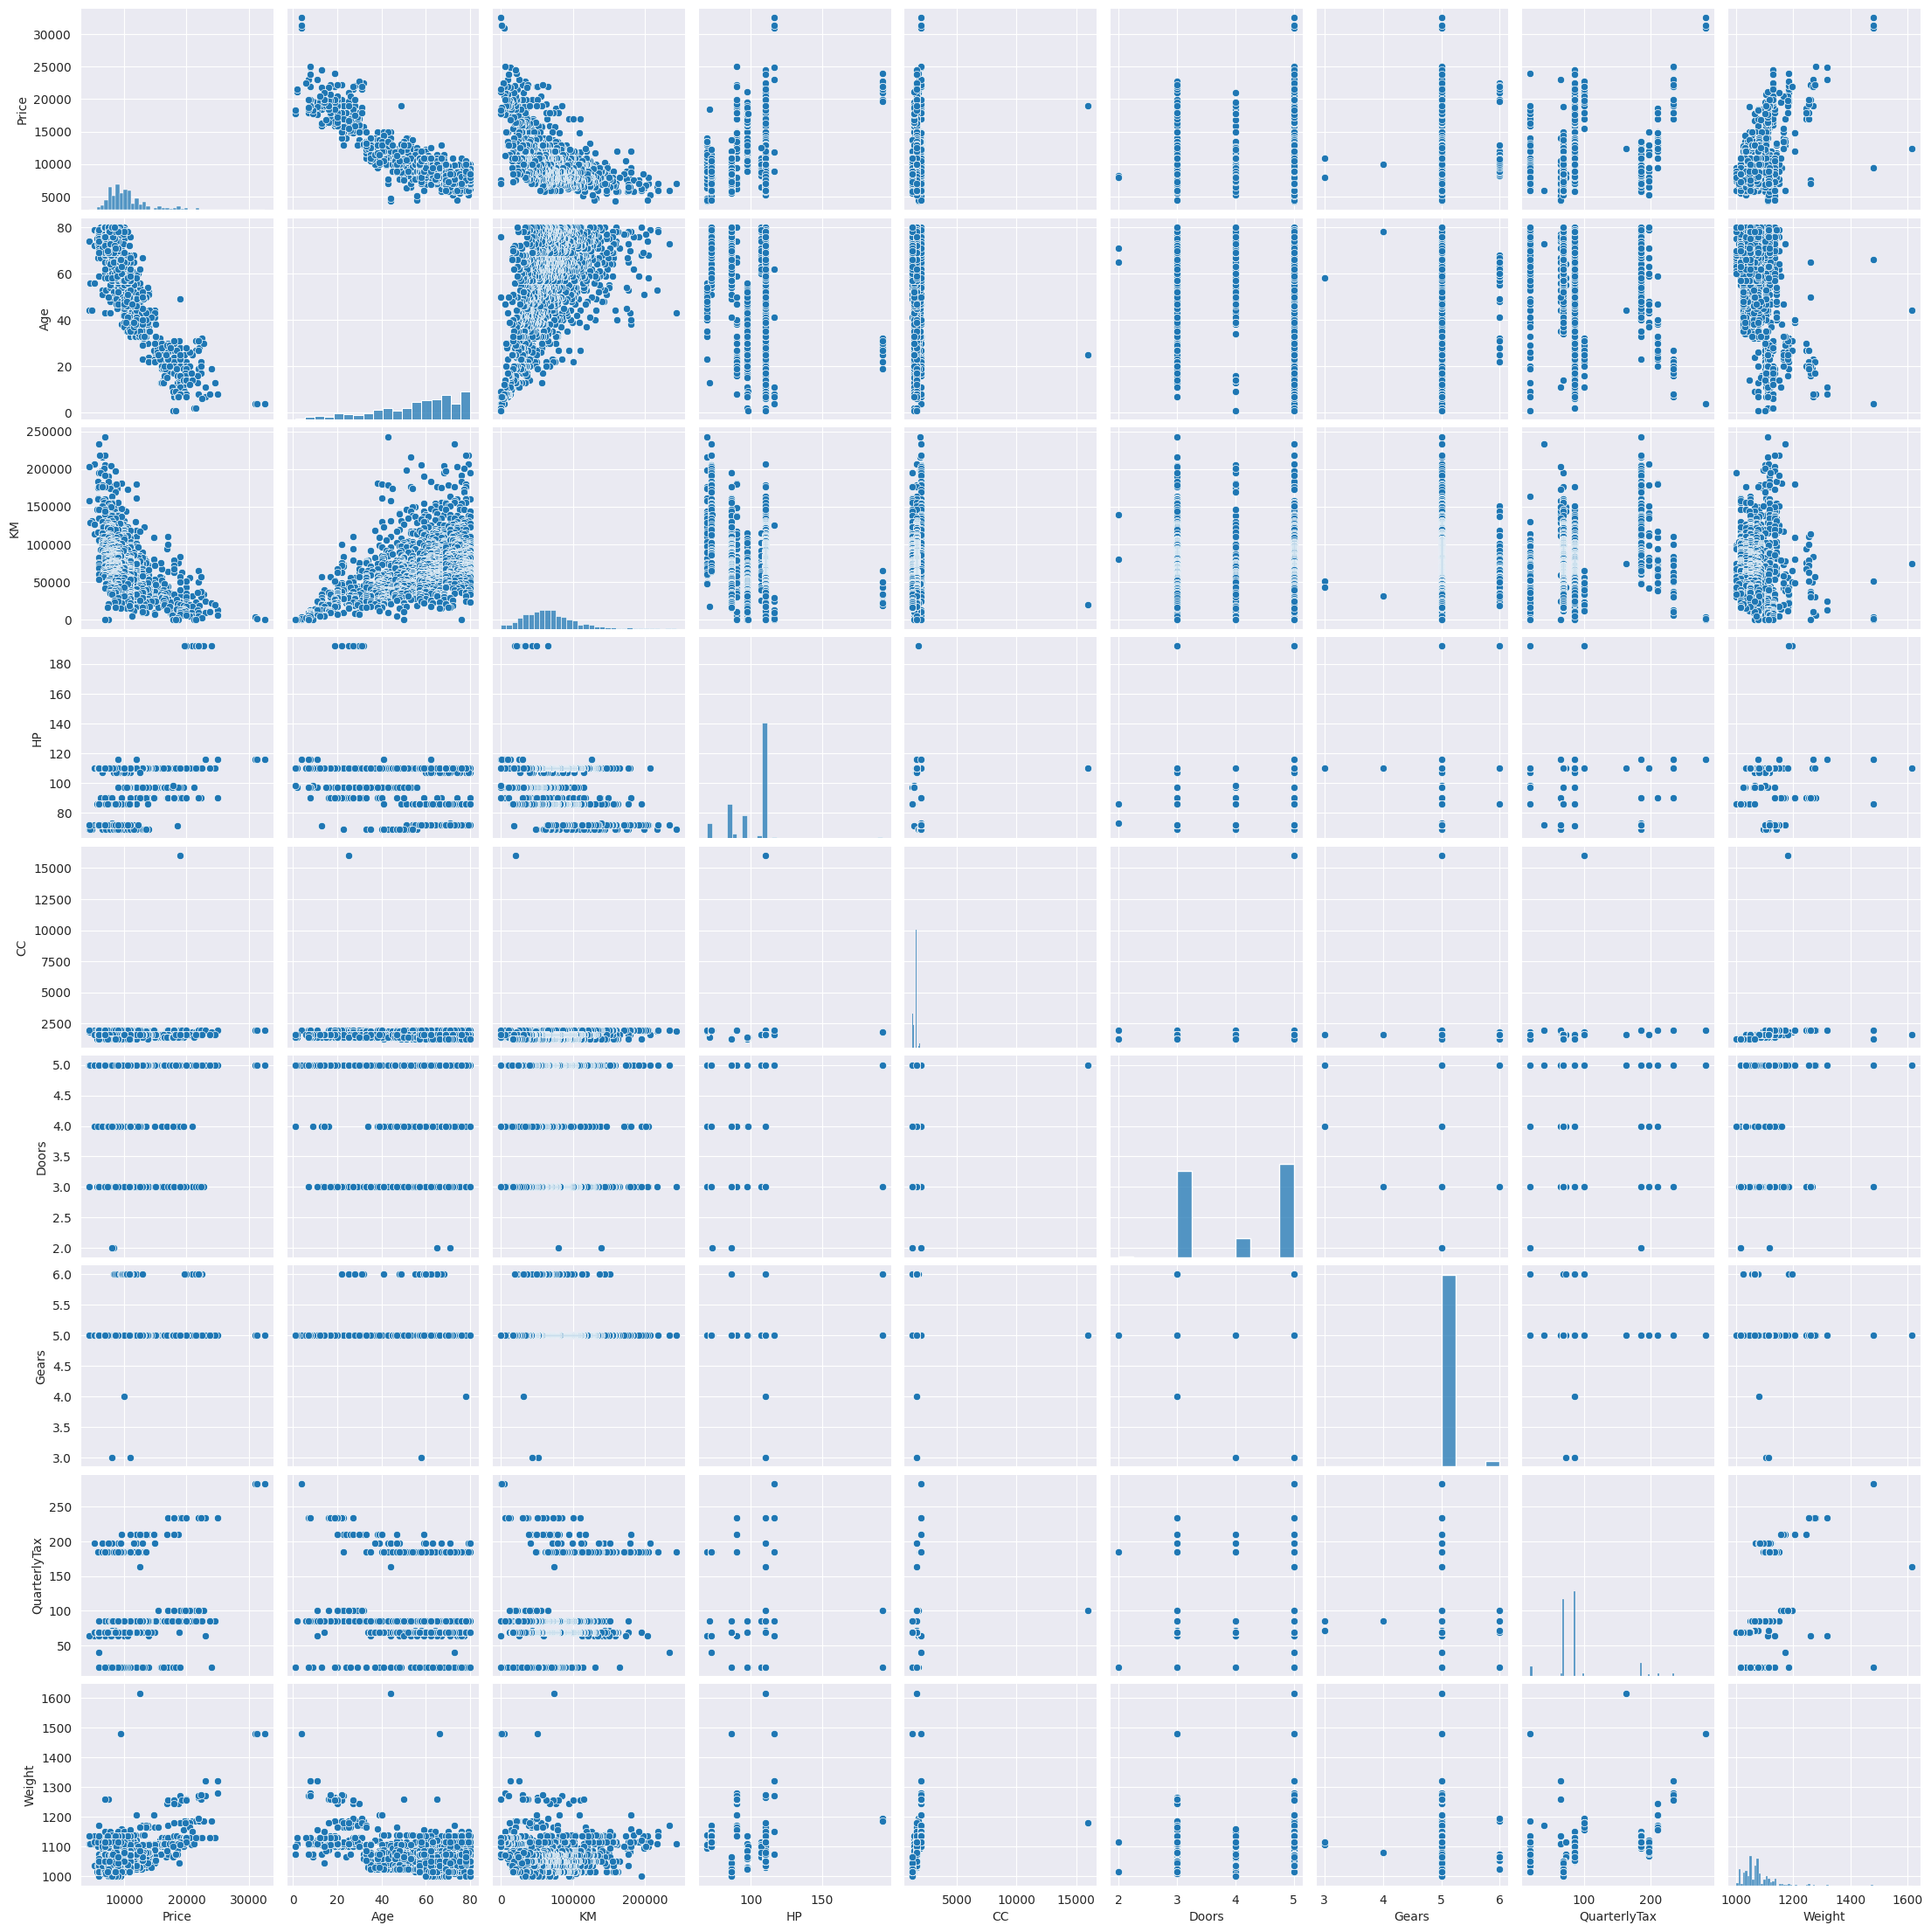

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)
plt.show()

**Model Building**

In [35]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QuarterlyTax+Weight',data=toyota2).fit()

**Model Testing**

In [36]:
model.params             #Finding coefficient parameters

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
CC                -0.118558
Doors             -0.920189
Gears            597.715894
QuarterlyTax       3.858805
Weight            16.855470
dtype: float64

In [37]:
model.summary()                        #Model accuracy is 86.2%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:00:42   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM              -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP              31.5846      2.818     11.210      0.000      26.058      37.112
CC              -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors           -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears          597.7159    196.969      3.035      0.002     211.335     984.097
QuarterlyTax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Validation**

In [38]:
#Collinearity check
#

rsquared_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QuarterlyTax+Weight", data=toyota2).fit().rsquared
VIF_Age = 1/(1-rsquared_Age)

rsquared_KM = smf.ols("KM~Age+HP+CC+Doors+Gears+QuarterlyTax+Weight", data=toyota2).fit().rsquared
VIF_KM = 1/(1-rsquared_KM)

rsquared_HP = smf.ols("HP~Age+KM+CC+Doors+Gears+QuarterlyTax+Weight", data=toyota2).fit().rsquared
VIF_HP = 1/(1-rsquared_HP)

rsquared_CC = smf.ols("CC~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight", data=toyota2).fit().rsquared
VIF_CC = 1/(1-rsquared_CC)

rsquared_Doors = smf.ols("Doors~Age+KM+HP+CC+Gears+QuarterlyTax+Weight", data=toyota2).fit().rsquared
VIF_Doors = 1/(1-rsquared_Doors)

rsquared_Gears = smf.ols("Gears~Age+KM+HP+CC+Doors+QuarterlyTax+Weight", data=toyota2).fit().rsquared
VIF_Gears = 1/(1-rsquared_Gears)

rsquared_QuarterlyTax = smf.ols("QuarterlyTax~Age+KM+HP+CC+Doors+Gears+Weight", data=toyota2).fit().rsquared
VIF_QuarterlyTax = 1/(1-rsquared_QuarterlyTax)

rsquared_Weight = smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QuarterlyTax", data=toyota2).fit().rsquared
VIF_Weight = 1/(1-rsquared_Weight)

VIF={"Features":["Age","KM","HP","CC","Doors","Gears","QuarterlyTax","Weight"],
     "VIF_Values":[VIF_Age,VIF_KM,VIF_HP,VIF_CC,VIF_Doors,VIF_Gears,VIF_QuarterlyTax,VIF_Weight]}
VIF_Frame = pd.DataFrame(VIF)
VIF_Frame

# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

,Features,VIF_Values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QuarterlyTax,2.295375
7,Weight,2.487180


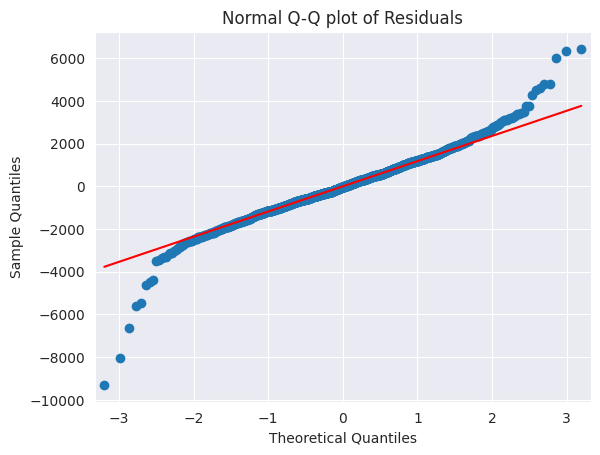

In [39]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [40]:
list (np.where(model.resid<-6000))               #Outlier detection

[array([220, 600, 959])]

In [41]:
list (np.where(model.resid>-6000)) 

[array([   0,    1,    2, ..., 1432, 1433, 1434])]

In [42]:
#Check for outliers
#Cook's distance 

model_influence = model.get_influence()
c,standard_distance = model_influence.cooks_distance
c                                                                #cook's distance > 1 then it's an outlier

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

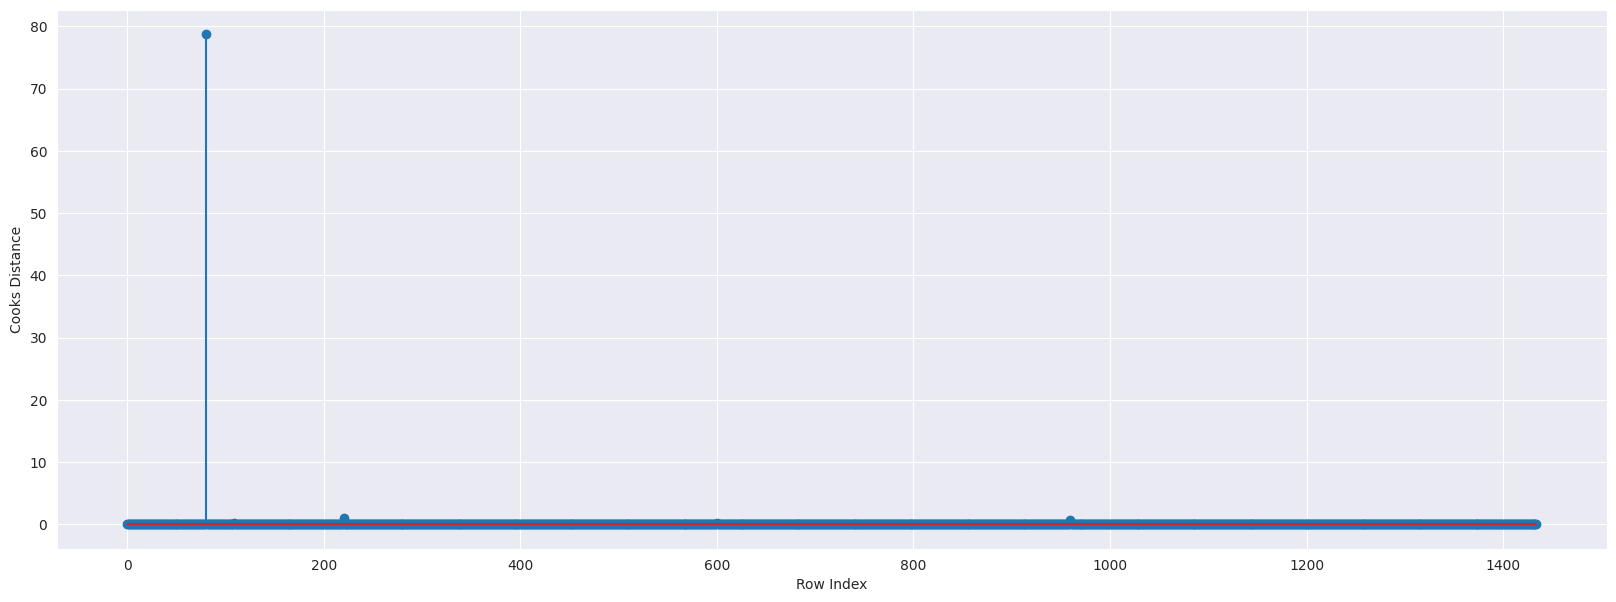

In [43]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
np.argmax(c) , np.max(c)            #index and value of influncer where c>0.5

(80, 78.72950582258932)

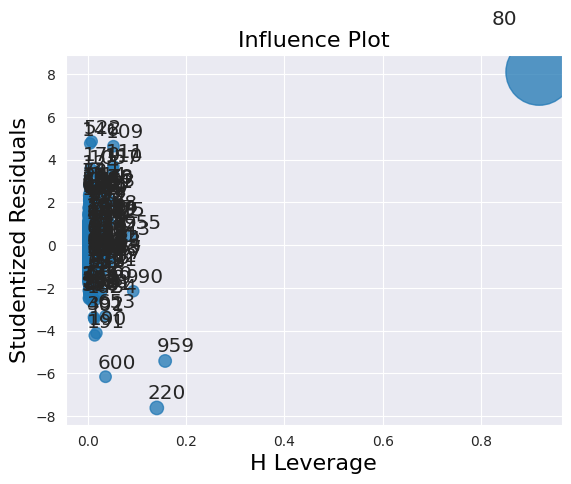

In [45]:
#Leverage value using high influence points  :  Points beyond leverage cutoff are influencers
influence_plot(model)
plt.show()

In [46]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyota2.shape[1]
n=toyota2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

#points beyond leverage cutoff value = 0.020905 are the outliers

0.020905923344947737

In [47]:
toyota2[toyota2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [48]:
toyota_new = toyota2.copy()             #creating a copy of dataset so that the original dataset does not changes
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [49]:
#Discard the influencer
toyota3=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


**Final Model**

In [50]:
final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QuarterlyTax+Weight',data=toyota3).fit()
final_model.rsquared , final_model.aic
print("Model accuracy:",final_model.rsquared)

Model accuracy: 0.8681163912634055


In [51]:
final_model.rsquared

0.8681163912634055

**Model Prediction**

In [52]:
pred_y = final_model.predict(toyota3)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64